## Making paper-ready joint plots

Oct 30, 2018  
N. Gosnell  


Apparently, it's very difficult to put some seaborn plots into subplots without some serious hacking: https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot  

We could also create 9 separate plots that are combined into a 3x3 figure in LaTeX. Let's try that route for now. But I'm including the link above in case we decide we need to make the 3x3 jointplots ourselves. 


Updated: Dec 16, 2020  
I'm making new plots with the same axis limits and better sized axis labels

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
#sns.set_context('paper', font_scale=2.0)

In [2]:
def setupkde(order,run,burn):
    ws = np.load('../sf/m'+str(order)+'/output/mix_emcee/run0'+str(run)+'/emcee_chain.npy')
    burned = ws[:, burn:,:]
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    nx, ny = fc.shape
    f_omega = 10**fc[:, 7] / (10**fc[:, 5] + 10**fc[:,7])
    burnedT2 = ws[:, burn:, 6] 
    Txs, Tys = burnedT2.shape
    T2 = burnedT2.reshape(Txs*Tys)
    return f_omega, T2

In [3]:
all_avail = [106, 107, 109, 110, 113, 114, 116, 118, 119]
no_plots = [101]
ms_forward = np.array(list(set(all_avail) - set(no_plots)), dtype=np.int)
ms = ms_forward[::-1]

0
1
2
3
4
5
6
7
8


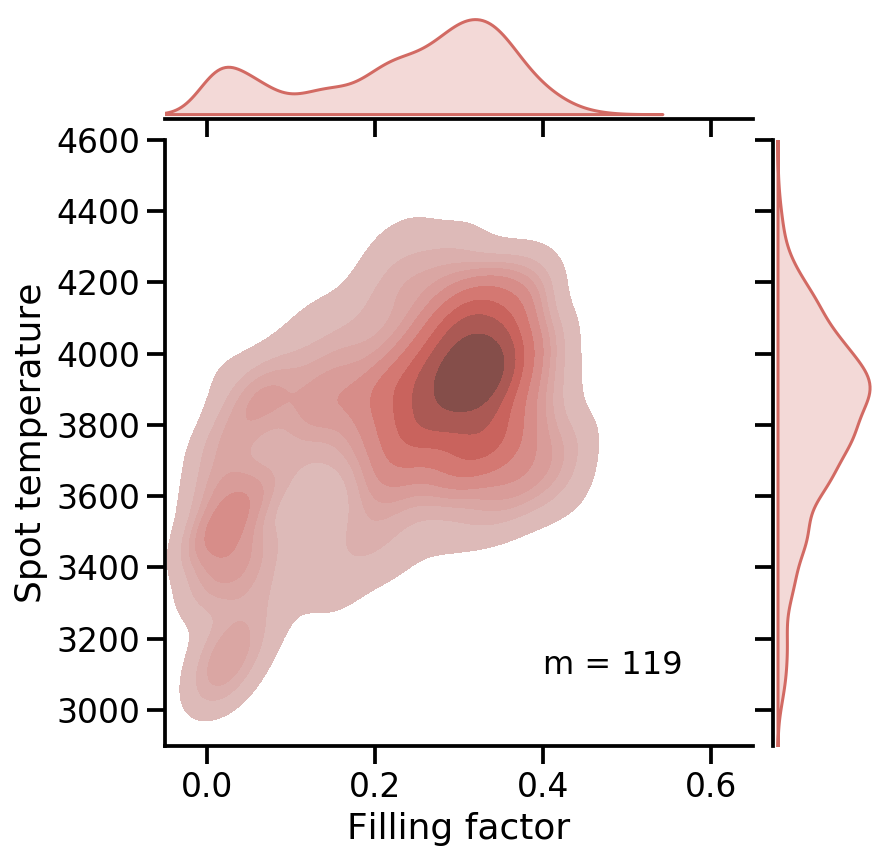

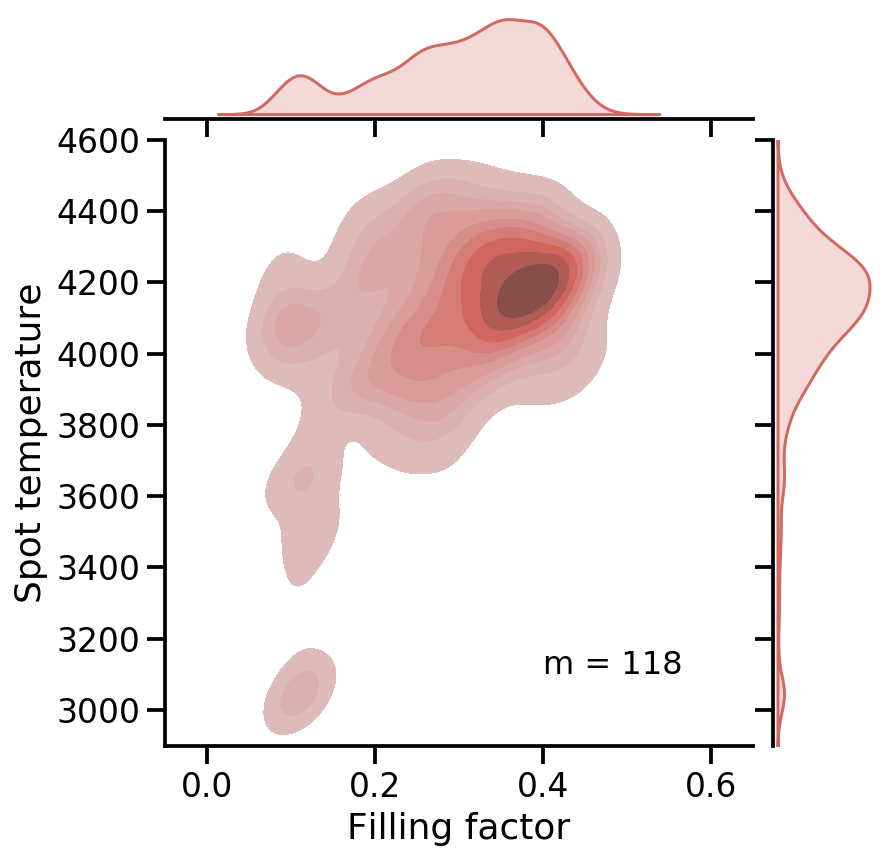

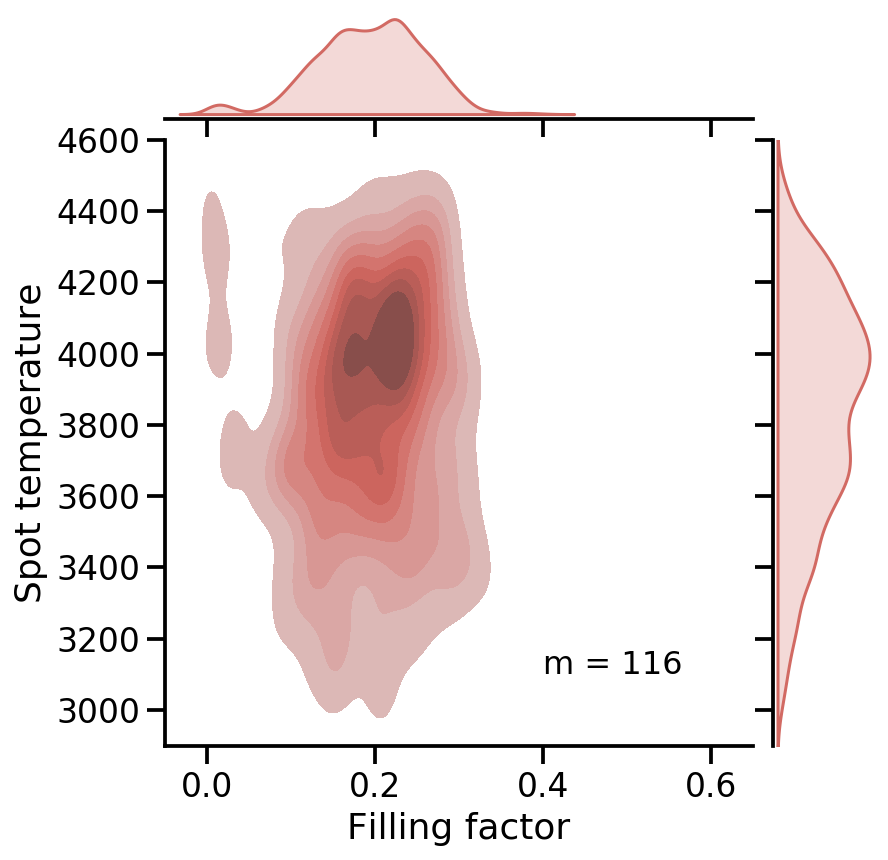

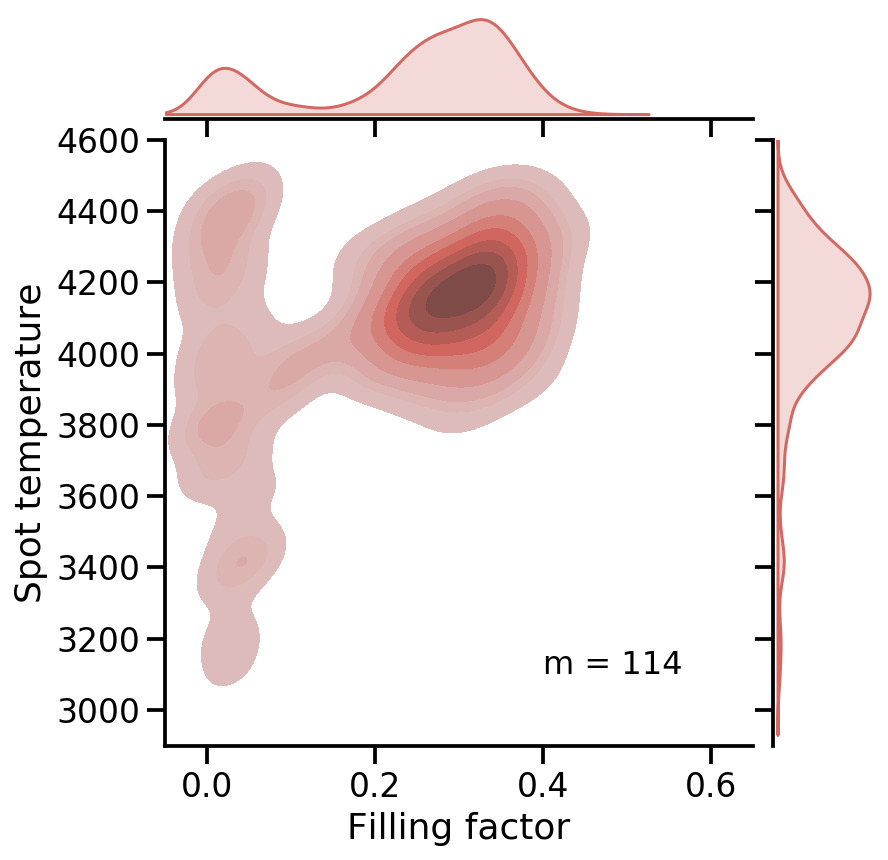

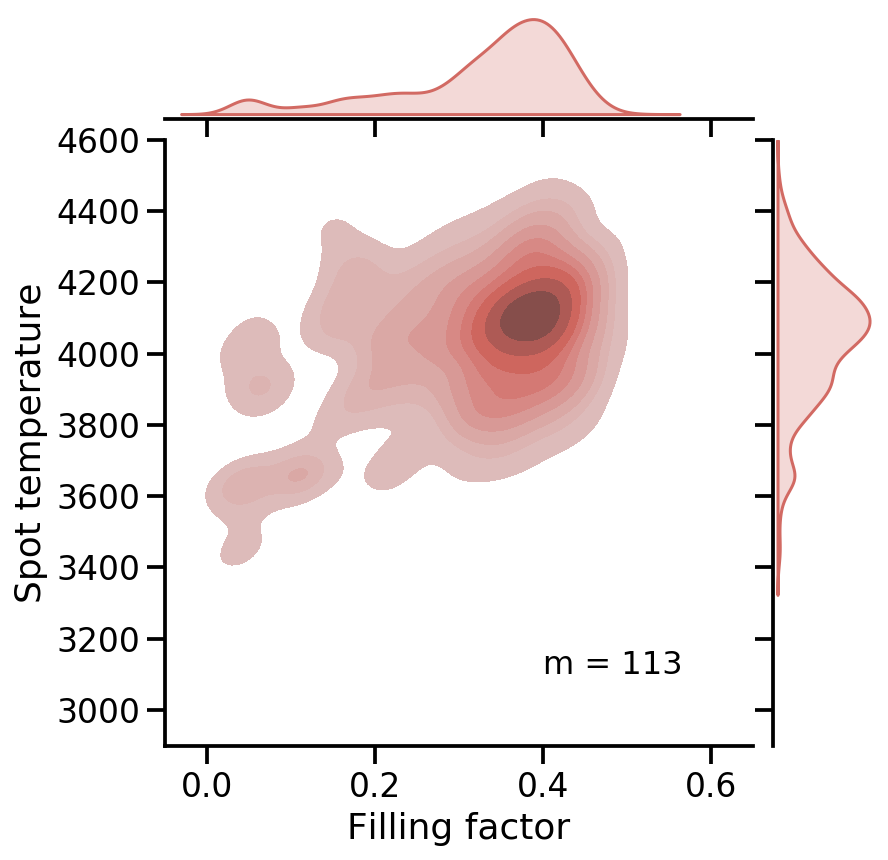

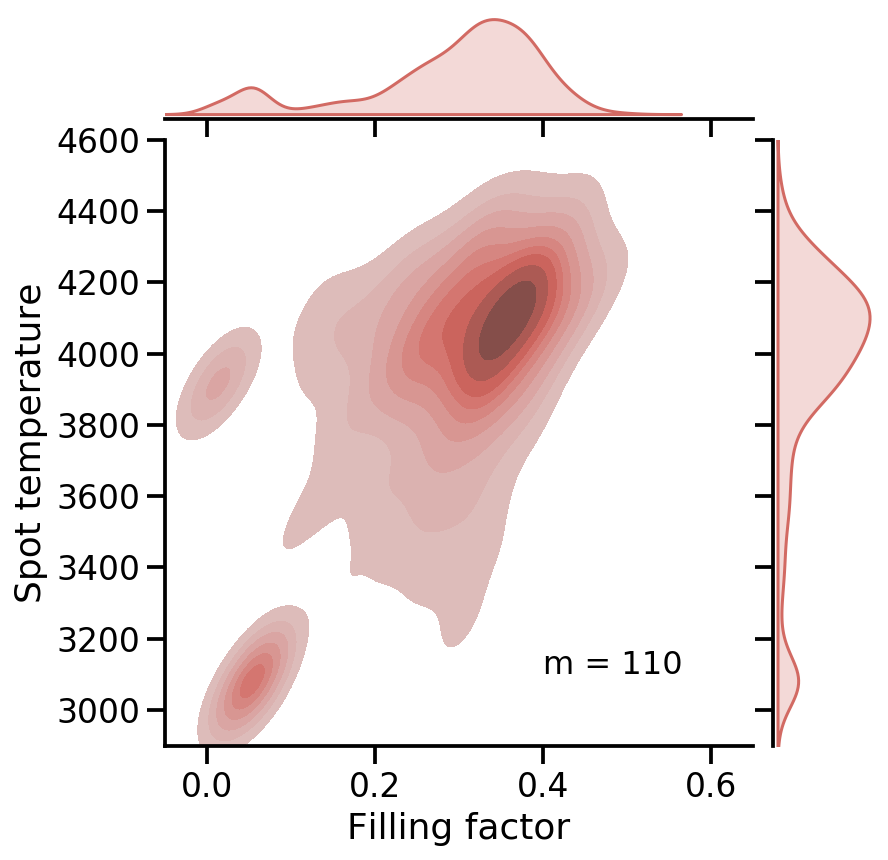

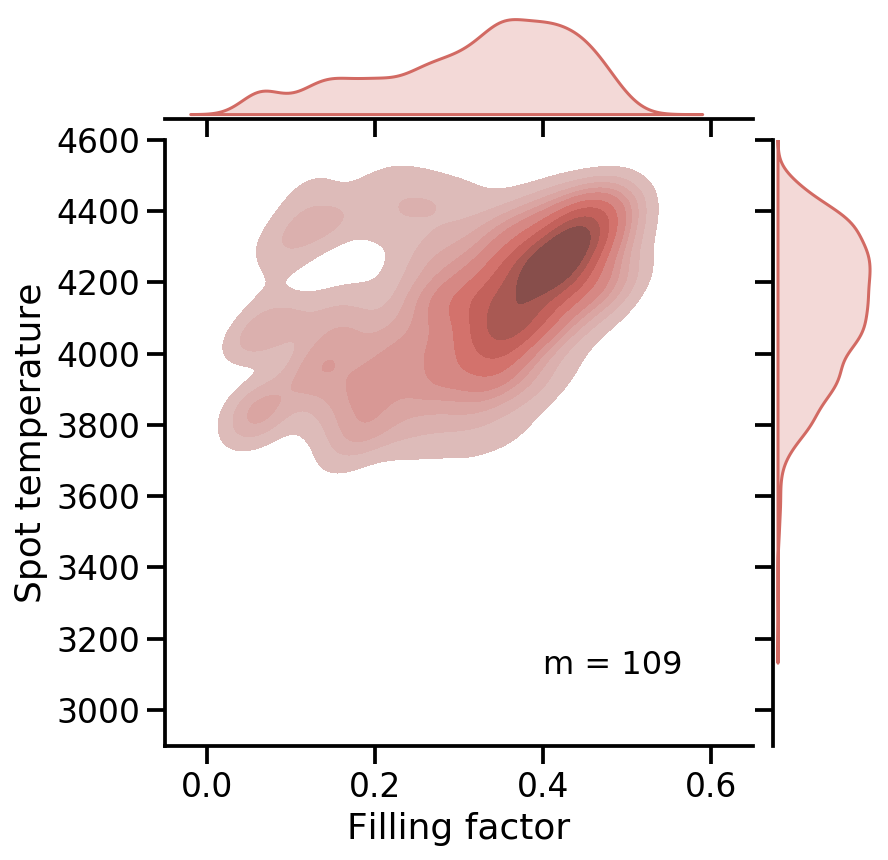

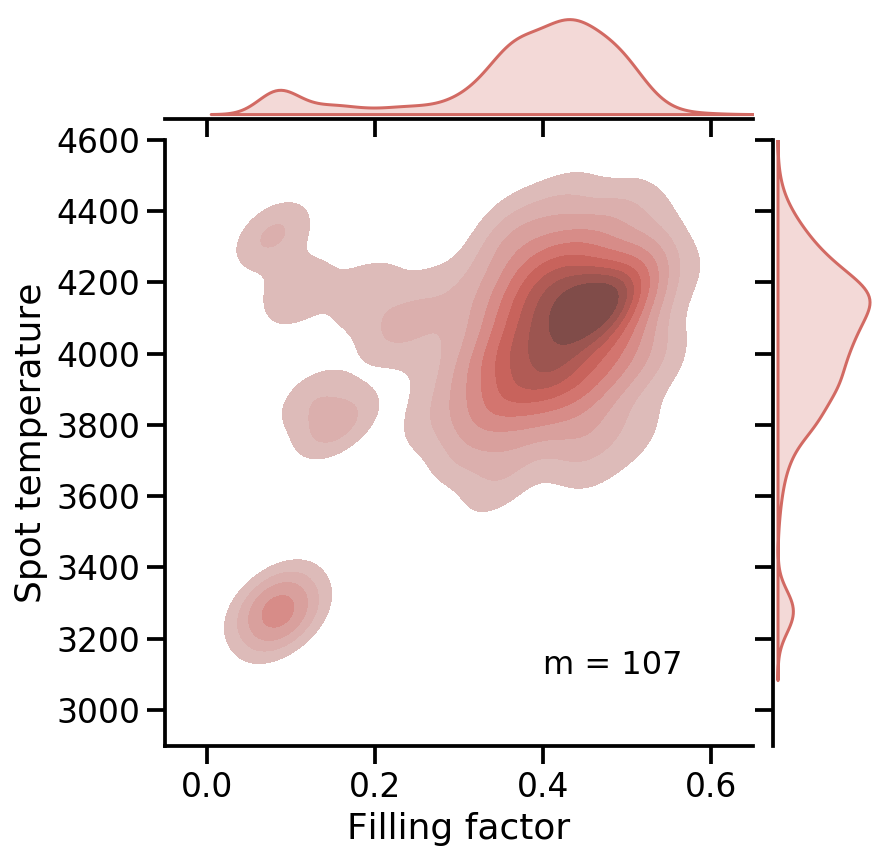

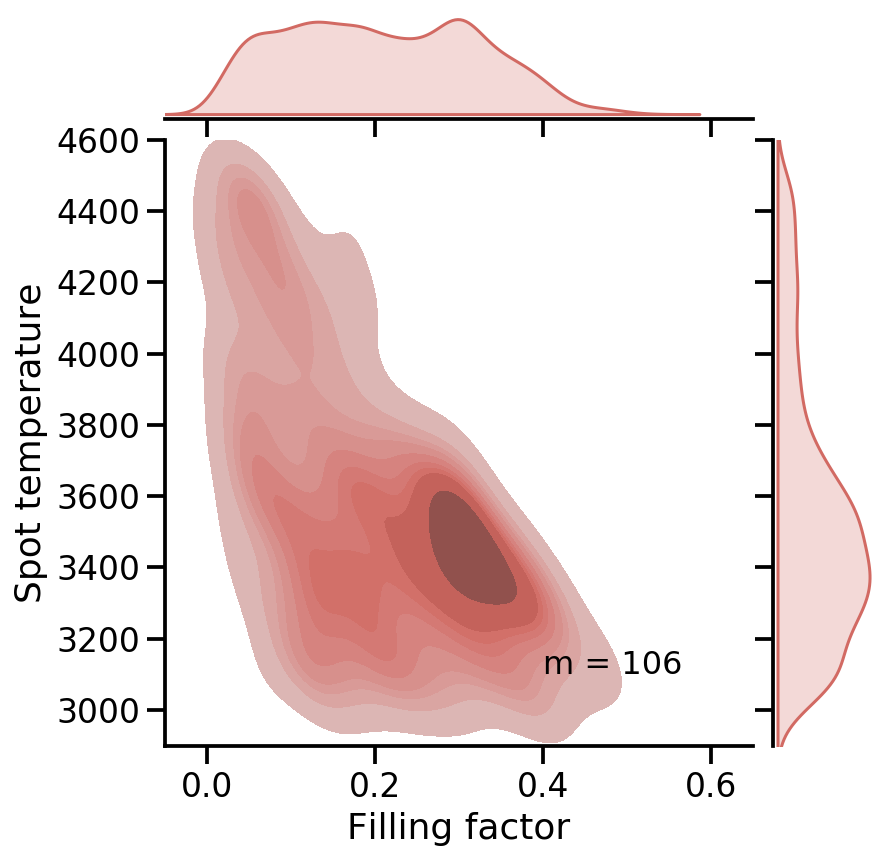

In [7]:
ii = -1

sns.set_context("talk")

for i in range(len(ms)):
    ii += 1
    print(ii)
    m = ms[ii]
    
    try:
        ws = np.load("../../sf/m{:03d}/output/mix_emcee/run02/emcee_chain.npy".format(m))
    except:
        ws = np.load("../../sf/m{:03d}/output/mix_emcee/run01/emcee_chain.npy".format(m))
    #Need to select the number to include for plotting:
    samplesize = 1000
    thin = 10
    burned = ws[:, -1*samplesize:-1:thin,:]
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    f_omega = 10**fc[:, 7]/(10**fc[:, 7]+10**fc[:, 5])
    burnedT2 = ws[:, -1*samplesize:-1:thin, 6] 
    Txs, Tys = burnedT2.shape
    T2 = burnedT2.reshape(Txs*Tys)
    
    p = sns.jointplot(f_omega, T2, kind='kde', color="#D26A63", fill="True")
    p.ax_marg_x.set_xlim(-0.05, 0.65)
    p.ax_marg_y.set_ylim(2900, 4600)
    p.set_axis_labels("Filling factor", "Spot temperature")
    p.ax_joint.text(0.40, 3100, "m = {}".format(m), fontsize=16)
    plt.savefig('../../document/figures/H_band_Tspot_fillingfactor_m{}_new.pdf'.format(m), bbox_inches='tight', dpi=300)
    

We also need the median values for spot temp and filling factor from each plot to include numbers in the paper...

In [16]:
ii = -1

fill = np.empty(0)
temp2 = np.empty(0)
temp1 = np.empty(0)

for i in range(len(ms)):
    ii += 1
    #print(ii)
    m = ms[ii]
    
    try:
        ws = np.load("../../sf/m{:03d}/output/mix_emcee/run02/emcee_chain.npy".format(m))
    except:
        ws = np.load("../../sf/m{:03d}/output/mix_emcee/run01/emcee_chain.npy".format(m))
    samplesize = 2000
    thin = 1
    burned = ws[:, -1*samplesize:-1:thin,:]
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    f_omega = 10**fc[:, 7]/(10**fc[:, 7]+10**fc[:, 5])
    burnedT2 = ws[:, -1*samplesize:-1:thin, 6] 
    Txs, Tys = burnedT2.shape
    T2 = burnedT2.reshape(Txs*Tys)
    
    burnedT1 = ws[:, -1*samplesize:-1:thin, 0] 
    Txs1, Tys1 = burnedT1.shape
    T1 = burnedT1.reshape(Txs1*Tys1)
    
    #burned = ws[:, -200:,:]
    #I'm only keeping the last 200 samples because that's what Gully did for the spectra plots
    
    
    #xs, ys, zs = burned.shape
    #fc = burned.reshape(xs*ys, zs)
    #f_omega = 10**fc[:, 7]/(10**fc[:, 7]+10**fc[:, 5])
    #burnedT2 = ws[:, -200:, 6] 
    #Txs, Tys = burnedT2.shape
    #T2 = burnedT2.reshape(Txs*Tys)
    #burnedT1 = ws[:, -200:, 0] 
    #Txs1, Tys1 = burnedT1.shape
    #T1 = burnedT1.reshape(Txs1*Tys1)
    fillingmedian = np.percentile(f_omega, 50)
    fill = np.append(fill, fillingmedian)
    temp2median = np.percentile(T2, 50)
    temp2 = np.append(temp2, temp2median)
    temp1median = np.percentile(T1, 50)
    temp1 = np.append(temp1, temp1median)

In [17]:
medt2 = np.median(temp2)
medt2err = np.std(temp2)
medt1 = np.median(temp1)
medt1err = np.std(temp1)
print(medt2, medt2err)
print(medt1, medt1err)
print(np.max(temp2))
print(np.min(temp2))
print(np.max(temp1))
print(np.min(temp1))
print(np.max(fill))
print(np.min(fill))
print(fill)

4020.128103148286 203.69228654014495
5161.161377868797 26.60448377218832
4137.834230573884
3452.713690727304
5216.23198411579
5137.421330574331
0.38915495518739224
0.1956411143341228
[0.24398171 0.3059801  0.19824595 0.24304632 0.33923768 0.30044062
 0.31761179 0.38915496 0.19564111]


In [18]:
medfill = np.median(fill)
medfillerr = np.std(fill)
print(medfill, medfillerr)

0.300440623185951 0.061801296862422084


How does this impact the effective temperature?

In [42]:
teff = (medfill*medt2**4.0 + (1 - medfill)*medt1**4.0)**0.25
print(teff)

4903.058387849473


## The End
(ta da!)